In [2]:
import pandas as pd

try:
    df = pd.read_csv("./Iniciação_Ciêntifica - Dados Abertos.csv", encoding='latin1', engine='python', sep=';')

    # Remover linhas duplicadas
    df = df.drop_duplicates()

    # Analisar os dados
    discentes = df['DiscenteID'].nunique()
    projetos_unicos = df['Codigo_Projeto'].nunique()
    orientadores = df['OrientadorID'].nunique()
    departamentos = df['Unidade'].nunique()

    # Assumindo que projetos voluntários são aqueles com 'Tipo_de_bolsa' igual a 'VOLUNTÁRIO'
    projetos_voluntario = df[df['Tipo_de_bolsa'] == 'VOLUNTÁRIO'].shape[0]
    projetos_bolsas = projetos_unicos - projetos_voluntario

    # Explorar outros insights: Contar o número de projetos por status
    status_projetos = df['status'].value_counts()

    # Apresentar os resultados
    print(f"Número de alunos: {discentes}")
    print(f"Número de projetos: {projetos_unicos}")
    print(f"Número de projetos voluntários: {projetos_voluntario}")
    print(f"Número de projetos não voluntários: {projetos_bolsas}")
    print(f"Número de orientadores: {orientadores}")
    print(f"Número de departamentos: {departamentos}")

    print("\nContagem de projetos por status:")
    print(status_projetos)

except FileNotFoundError:
    print("Erro: Arquivo não encontrado. Verifique o caminho do arquivo.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Número de alunos: 25424
Número de projetos: 16936
Número de projetos voluntários: 14706
Número de projetos não voluntários: 2230
Número de orientadores: 2558
Número de departamentos: 237

Contagem de projetos por status:
status
FINALIZADO               40875
PENDENTE DE RELATORIO     5954
EM ANDAMENTO              1658
Name: count, dtype: int64


In [4]:
# Obtém os conjuntos de DiscenteID e OrientadorID únicos do DataFrame
discentes_ids = set(df['Discente'].unique())
orientadores_ids = set(df['Orientador'].unique())

# Encontra IDs que aparecem em ambas as listas
discentes_como_orientadores_ids = discentes_ids.intersection(orientadores_ids)

# Apresenta os resultados
numero_discentes_como_orientadores = len(discentes_como_orientadores_ids)

print(f"Número de discentes que também são orientadores: {numero_discentes_como_orientadores}")

if numero_discentes_como_orientadores > 0:
    print("\nDiscentes que também são orientadores:")
    # Recupera os nomes dos discentes que também são orientadores
    discentes_como_orientadores_nomes = df[df['Discente'].isin(discentes_como_orientadores_ids)]['Discente'].unique()
    for nome in discentes_como_orientadores_nomes:
        print(nome)
else:
    print("\nNão foram encontrados discentes que também atuam como orientadores no conjunto de dados.")

Número de discentes que também são orientadores: 191

Discentes que também são orientadores:
ADALA NAYANA DE SOUSA MATA
ADA LIMA FERREIRA DE SOUSA
ADRIANA DA SILVA BRITO
ADRIANNE PAULA VIEIRA DE ANDRADE
ALCIDES VIANA DE LIMA NETO
ALEXSANDRO PEREIRA LIMA
ALINE BRAGA GALVAO SILVEIRA FERNANDES
ALINY DAYANY PEREIRA DE MEDEIROS PRANTO
ALYSON MATHEUS DE CARVALHO SOUZA
ANA CAROLINA DE OLIVEIRA NEVES MENEZES
ANA CECILIA VIEIRA DA NOBREGA
ANA KALLINY DE SOUSA SEVERO
ANA KARINA SILVA AZEVEDO
ANA LUDMILA FREIRE COSTA
ANA LUIZA BRAGA DE MACEDO LOMBARDI
ANA PAULA COSTA CAMARA
ANA RAFAELA LUZ DE AQUINO MARTINS
ANDERSON CRISTOPHER DOS SANTOS
ANDERSON DIAS VIANA
ANDERSON PAIVA CRUZ
ANDRE LUIS LOPES MORIYAMA
ANNA BEATRIZ SANTANA LUZ
ANNA GISELLE CAMARA DANTAS RIBEIRO RODRIGUES
ANTONINO ALVES FEITOSA NETO
ARTHUR CESAR DE MEDEIROS ALVES
ARTHUR EMANOEL CASSIO DA SILVA E SOUZA
ARYELLY DAYANE DA SILVA NUNES ARAÚJO
BARBARA LAIS FELIPE DE OLIVEIRA
BISMARCK LUIZ SILVA
BLENDA CARINE DANTAS DE MEDEIROS
BONIEK CA

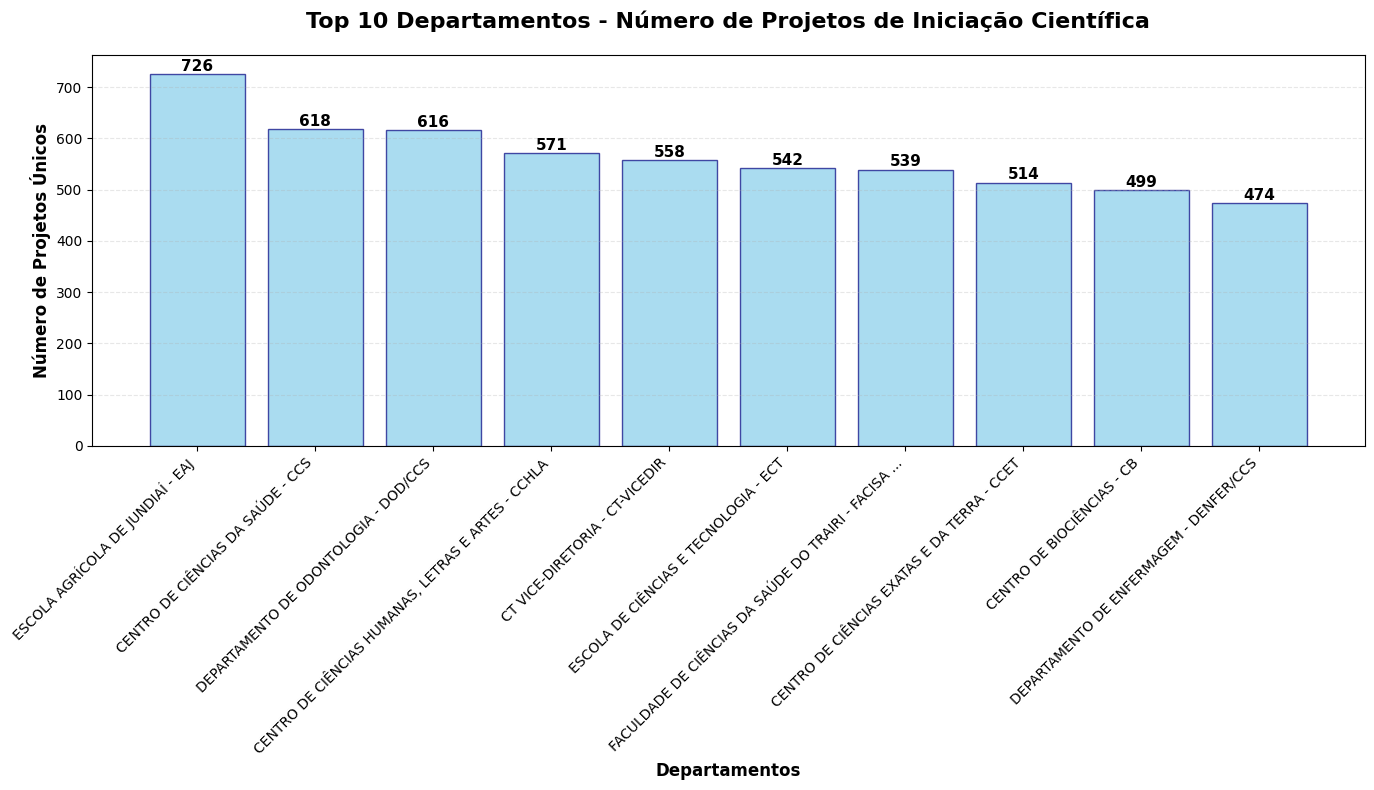

📊 TOP 10 DEPARTAMENTOS - NÚMERO DE PROJETOS:
 1º ESCOLA AGRÍCOLA DE JUNDIAÍ - EAJ... : 726 projetos
 2º CENTRO DE CIÊNCIAS DA SAÚDE - CCS... : 618 projetos
 3º DEPARTAMENTO DE ODONTOLOGIA - DOD/CCS... : 616 projetos
 4º CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES - CCHLA... : 571 projetos
 5º CT VICE-DIRETORIA - CT-VICEDIR... : 558 projetos
 6º ESCOLA DE CIÊNCIAS E TECNOLOGIA - ECT... : 542 projetos
 7º FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA - FACISA... : 539 projetos
 8º CENTRO DE CIÊNCIAS EXATAS E DA TERRA - CCET... : 514 projetos
 9º CENTRO DE BIOCIÊNCIAS - CB... : 499 projetos
10º DEPARTAMENTO DE ENFERMAGEM - DENFER/CCS... : 474 projetos

📈 ESTATÍSTICAS GERAIS:
• Total de departamentos: 237
• Departamento com mais projetos: 726 projetos
• Departamento com menos projetos (top 10): 474 projetos
• Total de projetos (top 10): 5657 projetos
• Percentual dos top 10: 33.4%


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar número de projetos únicos por departamento
projetos_por_departamento = df.groupby('Unidade')['Codigo_Projeto'].nunique().reset_index()
projetos_por_departamento.columns = ['Departamento', 'Numero_Projetos']

# Ordenar por número de projetos (decrescente) e pegar os top 10
top_10_departamentos = projetos_por_departamento.sort_values('Numero_Projetos', ascending=False).head(10)

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(top_10_departamentos)), top_10_departamentos['Numero_Projetos'], 
               color='skyblue', edgecolor='navy', alpha=0.7)

# Personalizar o gráfico
plt.title('Top 10 Departamentos - Número de Projetos de Iniciação Científica', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Departamentos', fontsize=12, fontweight='bold')
plt.ylabel('Número de Projetos Únicos', fontsize=12, fontweight='bold')

# Configurar rótulos do eixo x
departamentos_labels = [dept[:50] + '...' if len(dept) > 50 else dept for dept in top_10_departamentos['Departamento']]
plt.xticks(range(len(top_10_departamentos)), departamentos_labels, rotation=45, ha='right', fontsize=10)

# Adicionar valores no topo de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Adicionar grid para melhor visualização
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ajustar layout para evitar corte de rótulos
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Mostrar estatísticas dos top 10
print("📊 TOP 10 DEPARTAMENTOS - NÚMERO DE PROJETOS:")
print("="*60)
for i, (idx, row) in enumerate(top_10_departamentos.iterrows(), 1):
    print(f"{i:2d}º {row['Departamento'][:60]}... : {row['Numero_Projetos']} projetos")

print(f"\n📈 ESTATÍSTICAS GERAIS:")
print(f"• Total de departamentos: {len(projetos_por_departamento)}")
print(f"• Departamento com mais projetos: {top_10_departamentos.iloc[0]['Numero_Projetos']} projetos")
print(f"• Departamento com menos projetos (top 10): {top_10_departamentos.iloc[-1]['Numero_Projetos']} projetos")
print(f"• Total de projetos (top 10): {top_10_departamentos['Numero_Projetos'].sum()} projetos")
print(f"• Percentual dos top 10: {(top_10_departamentos['Numero_Projetos'].sum() / projetos_por_departamento['Numero_Projetos'].sum() * 100):.1f}%")